1. Faça o processamento dos dados que vimos durante as últimas aulas para prever o preço da ação da AMAZON (coluna Close) base `acao_amazon.csv`.

In [16]:
import pandas as pd
df = pd.read_csv('/content/acao_amazon.csv')

df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
1,2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2,2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
3,2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
4,2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


In [18]:
# date para datetime
df['Date'] = pd.to_datetime(df['Date'])

# ordenando os valores em ordem crescente pela data
df = df.sort_values(by='Date')

df = df[['Open', 'High', 'Low', 'Volume', 'Close']]

In [19]:
df.head()

,Open,High,Low,Volume,Close
0,47.47,47.85,46.25,7582127,47.58
1,47.48,47.73,46.69,7440914,47.25
2,47.16,48.20,47.11,5417258,47.65
3,47.97,48.58,47.32,6154285,47.87
4,46.55,47.10,46.40,8945056,47.08


In [20]:
import numpy as np

def create_lookback_data(df, lookback):
    """
    Função para criar dados de entrada e saída para uma LSTM usando uma janela de lookback.

    Parâmetros:
    df (DataFrame): DataFrame contendo os dados. A última coluna é a coluna alvo.
    lookback (int): Número de dias para a janela de lookback.

    Retorna:
    X (numpy array): Dados de entrada para a LSTM, de formato (n_amostras, lookback, n_features).
    y (numpy array): Dados de saída/targets, de formato (n_amostras,).
    """
    data = df.values
    X, y = [], []

    for i in range(lookback, len(data)):
        X.append(data[i - lookback:i, :])  # Todas as colunas exceto a última (características)
        y.append(data[i, -1])               # Apenas a última coluna (alvo)

    return np.array(X), np.array(y)

In [21]:
lookback = 20
X, y = create_lookback_data(df, lookback)

print(f"Formato de X: {X.shape}")
print(f"Formato de y: {y.shape}")

Formato de X: (2999, 20, 5)
Formato de y: (2999,)



2. Separe 15% dos dados para teste e utilize 10% dos dados de treinamento como dados de validação durante o treinamento.


In [22]:
from sklearn.model_selection import train_test_split

# 15% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)

# 10% validação
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, shuffle=False)

print(f"Formato de X_train: {X_train.shape}")
print(f"Formato de X_val: {X_val.shape}")
print(f"Formato de X_test: {X_test.shape}")
print(f"Formato de y_train: {y_train.shape}")
print(f"Formato de y_val: {y_val.shape}")
print(f"Formato de y_test: {y_test.shape}")

Formato de X_train: (2294, 20, 5)
Formato de X_val: (255, 20, 5)
Formato de X_test: (450, 20, 5)
Formato de y_train: (2294,)
Formato de y_val: (255,)
Formato de y_test: (450,)


In [23]:
2294 * 20

45880

In [24]:
X_train.reshape(-1, X_train.shape[-1]).shape

(45880, 5)

In [25]:
X_train[0]

array([[4.747000e+01, 4.785000e+01, 4.625000e+01, 7.582127e+06,
        4.758000e+01],
       [4.748000e+01, 4.773000e+01, 4.669000e+01, 7.440914e+06,
        4.725000e+01],
       [4.716000e+01, 4.820000e+01, 4.711000e+01, 5.417258e+06,
        4.765000e+01],
       [4.797000e+01, 4.858000e+01, 4.732000e+01, 6.154285e+06,
        4.787000e+01],
       [4.655000e+01, 4.710000e+01, 4.640000e+01, 8.945056e+06,
        4.708000e+01],
       [4.641000e+01, 4.675000e+01, 4.536000e+01, 9.686957e+06,
        4.565000e+01],
       [4.565000e+01, 4.570000e+01, 4.426000e+01, 8.497383e+06,
        4.493000e+01],
       [4.479000e+01, 4.509000e+01, 4.409000e+01, 5.818301e+06,
        4.436000e+01],
       [4.448000e+01, 4.485000e+01, 4.400000e+01, 4.432237e+06,
        4.440000e+01],
       [4.395000e+01, 4.432000e+01, 4.366000e+01, 5.635225e+06,
        4.400000e+01],
       [4.319000e+01, 4.459000e+01, 4.310000e+01, 8.744464e+06,
        4.432000e+01],
       [4.450000e+01, 4.524000e+01, 4.43000

In [26]:
from sklearn.preprocessing import MinMaxScaler

# Normalizando os dados de treinamento
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

In [28]:
# Ajustando a forma de X_train para duas dimensões antes da normalização
X_train_reshaped = X_train.reshape(-1, X_train.shape[-1])
print(X_train_reshaped.shape)
X_train_reshaped[0]

(45880, 5)


array([4.747000e+01, 4.785000e+01, 4.625000e+01, 7.582127e+06,
       4.758000e+01])

In [30]:
# Normaliza os valores
X_train_scaled = scaler_X.fit_transform(X_train_reshaped)
print(X_train_scaled.shape)
X_train_scaled[0]

(45880, 5)


array([0.05598178, 0.05644908, 0.05445992, 0.06377693, 0.05645966])

In [31]:
# Ajustando a forma de volta para três dimensões após a normalização
X_train = X_train_scaled.reshape(X_train.shape)
print(X_train.shape)
X_train[0]

(2294, 20, 5)


array([[0.05598178, 0.05644908, 0.05445992, 0.06377693, 0.05645966],
       [0.05600796, 0.05613474, 0.05562939, 0.06241147, 0.05559347],
       [0.05517007, 0.05736588, 0.05674569, 0.04284376, 0.05664339],
       [0.05729098, 0.05836127, 0.05730385, 0.04997043, 0.05722085],
       [0.05357283, 0.05448449, 0.0548586 , 0.07695574, 0.05514725],
       [0.05320625, 0.05356769, 0.05209441, 0.08412954, 0.05139377],
       [0.05121626, 0.05081727, 0.04917074, 0.07262698, 0.04950391],
       [0.04896442, 0.0492194 , 0.0487189 , 0.04672164, 0.04800777],
       [0.04815271, 0.04859074, 0.04847969, 0.03331912, 0.04811276],
       [0.04676494, 0.04720243, 0.04757602, 0.04495139, 0.04706284],
       [0.04477495, 0.04790968, 0.0460876 , 0.07501612, 0.04790278],
       [0.04820507, 0.04961232, 0.04927706, 0.04032711, 0.048244  ],
       [0.0474981 , 0.04730721, 0.04635339, 0.07114705, 0.04685285],
       [0.04736718, 0.04832879, 0.04715075, 0.04608839, 0.04635414],
       [0.0460056 , 0.04749057, 0.

In [32]:
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))

# Normalizando os dados de teste
X_test = scaler_X.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
y_test = scaler_y.transform(y_test.reshape(-1, 1))


3. Treine um modelo de RNN, outro de GRU e outro de LSTM, cada um com 5 camadas contendo 50, 40, 30, 20 e 10 neurônios, respectivamente.


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Definindo o modelo RNN
rnn_model = Sequential([
    SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    SimpleRNN(40, return_sequences=True),
    SimpleRNN(30, return_sequences=True),
    SimpleRNN(20, return_sequences=True),
    SimpleRNN(10),
    Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mean_squared_error')
rnn_history = rnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 0.1361 - val_loss: 281116.9375
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0014 - val_loss: 281094.4688
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 8.5092e-04 - val_loss: 281081.4062
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 6.5732e-04 - val_loss: 281082.9375
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.8145e-04 - val_loss: 281086.3750
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.4429e-04 - val_loss: 281093.6562
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 4.3276e-04 - val_loss: 281099.2812
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.6904e-04 - val_loss: 281109.2812
Epoch 9/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 5.1395e-04 - val_loss: 281121.8750
Epoch 10/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2545e-04 - val_loss: 281130.4688
Epoch 11/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.4282

In [35]:
from tensorflow.keras.layers import GRU

# Definindo o modelo GRU
gru_model = Sequential([
    GRU(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    GRU(40, return_sequences=True),
    GRU(30, return_sequences=True),
    GRU(20, return_sequences=True),
    GRU(10),
    Dense(1)
])

gru_model.compile(optimizer='adam', loss='mean_squared_error')
gru_history = gru_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 17s 85ms/step - loss: 0.0472 - val_loss: 281307.5312
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 8.1549e-04 - val_loss: 281175.8750
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - loss: 6.2920e-04 - val_loss: 281126.9375
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 5.3029e-04 - val_loss: 281090.2500
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 4.0387e-04 - val_loss: 281054.8125
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 3.7418e-04 - val_loss: 281034.2500
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 3.3358e-04 - val_loss: 280945.7188
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 3.0857e-04 - val_loss: 280918.4688
Epoch 9/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 3.0447e-04 - val_loss: 280849.3750
Epoch 10/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 2.3678e-04 - val_loss: 280848.7812
Epoch 11/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - loss: 

In [36]:
from tensorflow.keras.layers import LSTM

# Definindo o modelo LSTM
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(40, return_sequences=True),
    LSTM(30, return_sequences=True),
    LSTM(20, return_sequences=True),
    LSTM(10),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - loss: 0.0423 - val_loss: 281037.5000
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0015 - val_loss: 280948.1250
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0013 - val_loss: 280933.2188
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0013 - val_loss: 280914.9688
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0012 - val_loss: 280762.4688
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0013 - val_loss: 280756.7812
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0011 - val_loss: 280736.8750
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0011 - val_loss: 280722.5000
Epoch 9/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0010 - val_loss: 280828.7188
Epoch 10/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0012 - val_loss: 280639.1875
Epoch 11/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0016 - val_loss: 280564.5938
Epoch 1


4. Coloque Dropout de 15% após as camadas com 50 e 20 neurônios.


In [39]:
from tensorflow.keras.layers import Dropout

rnn_model = Sequential([
    SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.15),
    SimpleRNN(40, return_sequences=True),
    SimpleRNN(30, return_sequences=True),
    SimpleRNN(20, return_sequences=True),
    Dropout(0.15),
    SimpleRNN(10),
    Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mean_squared_error')

In [40]:
gru_model = Sequential([
    GRU(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.15),
    GRU(40, return_sequences=True),
    GRU(30, return_sequences=True),
    GRU(20, return_sequences=True),
    Dropout(0.15),
    GRU(10),
    Dense(1)
])

gru_model.compile(optimizer='adam', loss='mean_squared_error')

In [41]:
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.15),
    LSTM(40, return_sequences=True),
    LSTM(30, return_sequences=True),
    LSTM(20, return_sequences=True),
    Dropout(0.15),
    LSTM(10),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mean_squared_error')


5. Treine os modelos por 20 épocas.


In [42]:
rnn_history = rnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - loss: 0.2583 - val_loss: 281810.6250
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0232 - val_loss: 281941.9062
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0132 - val_loss: 281998.1875
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0087 - val_loss: 282047.5312
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0070 - val_loss: 282093.0000
Epoch 6/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0061 - val_loss: 282109.3125
Epoch 7/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0047 - val_loss: 282154.9062
Epoch 8/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0043 - val_loss: 282150.3750
Epoch 9/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0036 - val_loss: 282188.0938
Epoch 10/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0035 - val_loss: 282205.3750
Epoch 11/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0035 - val_loss: 282201.7812
Epoch 1

In [43]:
gru_history = gru_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 16s 79ms/step - loss: 0.0248 - val_loss: 281024.7812
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0021 - val_loss: 280827.9375
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0013 - val_loss: 280793.3750
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0011 - val_loss: 280696.9375
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0012 - val_loss: 280597.4062
Epoch 6/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 9.4380e-04 - val_loss: 280498.2812
Epoch 7/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 9.9644e-04 - val_loss: 280518.7188
Epoch 8/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 9.7924e-04 - val_loss: 280542.2188
Epoch 9/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 7.6051e-04 - val_loss: 280519.6250
Epoch 10/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 7.7353e-04 - val_loss: 280363.3125
Epoch 11/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 8.7647e-04 - val_l

In [44]:
lstm_history = lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - loss: 0.0467 - val_loss: 280558.8125
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0018 - val_loss: 280542.7500
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0017 - val_loss: 280541.0000
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0019 - val_loss: 280494.4375
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0016 - val_loss: 280443.3438
Epoch 6/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0016 - val_loss: 280306.7188
Epoch 7/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 0.0014 - val_loss: 280311.4375
Epoch 8/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0015 - val_loss: 280279.9062
Epoch 9/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0013 - val_loss: 280209.1562
Epoch 10/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0013 - val_loss: 280242.5000
Epoch 11/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0014 - val_loss: 280202.9375
Epoch 1


6. Salve o history e exiba os valores de loss de treinamento e validação para os três modelos.


In [45]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    plt.plot(history.history['loss'], label='Treinamento')
    plt.plot(history.history['val_loss'], label='Validação')
    plt.title(f'Perda (Loss) - {model_name}')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

RNN Loss de Treinamento: 0.001994263380765915
RNN Loss de Validação: 282206.84375


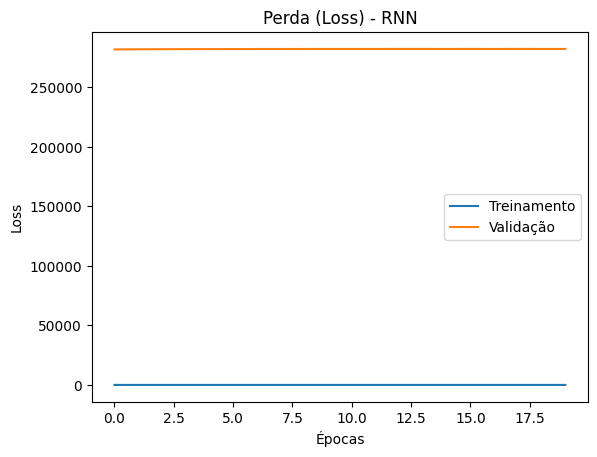

In [46]:
# RNN
rnn_history_df = pd.DataFrame(rnn_history.history)
rnn_history_df.to_csv('rnn_history.csv')
print("RNN Loss de Treinamento:", rnn_history.history['loss'][-1])
print("RNN Loss de Validação:", rnn_history.history['val_loss'][-1])
plot_history(rnn_history, "RNN")

GRU Loss de Treinamento: 0.0005605009500868618
GRU Loss de Validação: 279930.46875


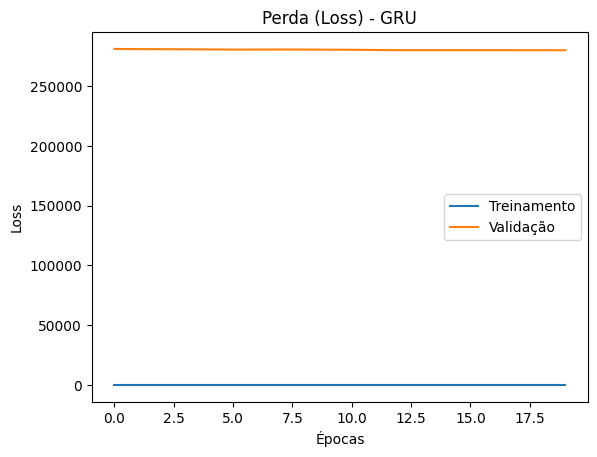

In [47]:
# GRU
gru_history_df = pd.DataFrame(gru_history.history)
gru_history_df.to_csv('gru_history.csv')
print("GRU Loss de Treinamento:", gru_history.history['loss'][-1])
print("GRU Loss de Validação:", gru_history.history['val_loss'][-1])
plot_history(gru_history, "GRU")

LSTM Loss de Treinamento: 0.0010069181444123387
LSTM Loss de Validação: 280422.46875


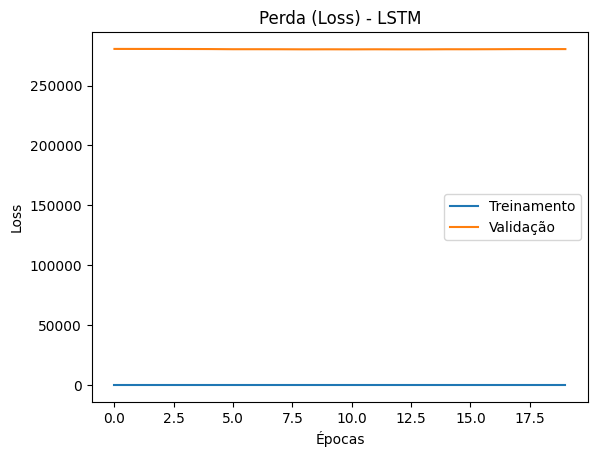

In [48]:
# LSTM
lstm_history_df = pd.DataFrame(lstm_history.history)
lstm_history_df.to_csv('lstm_history.csv')
print("LSTM Loss de Treinamento:", lstm_history.history['loss'][-1])
print("LSTM Loss de Validação:", lstm_history.history['val_loss'][-1])
plot_history(lstm_history, "LSTM")


7. Exiba as métricas MSE, MAE, RMSE e R² para os dados de treinamento e teste dos três modelos.


In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# exibir as métricas
def calculate_metrics(model, X_train, y_train, X_test, y_test, scaler_y, model_name):
    # previsões treinamento
    y_train_pred = model.predict(X_train)
    y_train_pred = scaler_y.inverse_transform(y_train_pred)
    y_train_true = scaler_y.inverse_transform(y_train.reshape(-1, 1))

    # previsões teste
    y_test_pred = model.predict(X_test)
    y_test_pred = scaler_y.inverse_transform(y_test_pred)
    y_test_true = scaler_y.inverse_transform(y_test.reshape(-1, 1))

    # métricas treinamento
    mse_train = mean_squared_error(y_train_true, y_train_pred)
    mae_train = mean_absolute_error(y_train_true, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train_true, y_train_pred)

    # métricas teste
    mse_test = mean_squared_error(y_test_true, y_test_pred)
    mae_test = mean_absolute_error(y_test_true, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test_true, y_test_pred)

    # resultados
    print(f'\nMétricas para o modelo {model_name}:')
    print(f'Treinamento - MSE: {mse_train:.4f}, MAE: {mae_train:.4f}, RMSE: {rmse_train:.4f}, R²: {r2_train:.4f}')
    print(f'Teste - MSE: {mse_test:.4f}, MAE: {mae_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}')

In [50]:
# RNN
calculate_metrics(rnn_model, X_train, y_train, X_test, y_test, scaler_y, "RNN")

72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Métricas para o modelo RNN:
Treinamento - MSE: 81.3734, MAE: 6.7278, RMSE: 9.0207, R²: 0.9928
Teste - MSE: 611400.2071, MAE: 746.7475, RMSE: 781.9208, R²: -27.2534


In [51]:
# GRU
calculate_metrics(gru_model, X_train, y_train, X_test, y_test, scaler_y, "GRU")

72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

Métricas para o modelo GRU:
Treinamento - MSE: 51.0905, MAE: 4.9039, RMSE: 7.1478, R²: 0.9955
Teste - MSE: 127016.7648, MAE: 328.3084, RMSE: 356.3941, R²: -4.8696


In [52]:
# LSTM
calculate_metrics(lstm_model, X_train, y_train, X_test, y_test, scaler_y, "LSTM")

72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Métricas para o modelo LSTM:
Treinamento - MSE: 119.8693, MAE: 7.9264, RMSE: 10.9485, R²: 0.9894
Teste - MSE: 166883.2217, MAE: 382.4289, RMSE: 408.5134, R²: -6.7118
